In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
data_orig = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data_orig.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data_orig.shape

(7043, 21)

In [5]:
data_no_censured = data_orig[data_orig['Churn'] == 'Yes']
data_censured = data_orig[data_orig['Churn'] == 'No']

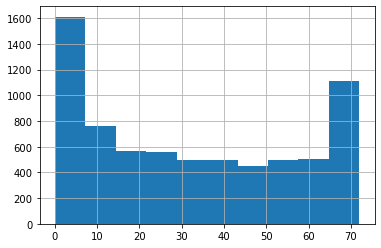

In [6]:
data_orig['tenure'].hist();

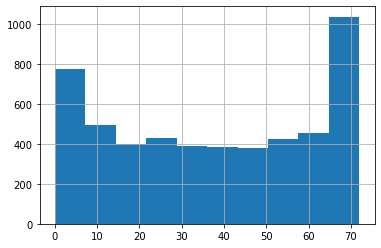

In [7]:
data_censured['tenure'].hist();

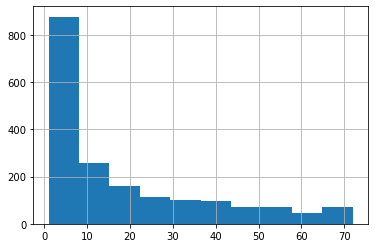

In [8]:
data_no_censured['tenure'].hist();

In [9]:
months = np.sort(data_orig['tenure'].unique())

In [10]:
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [11]:
n_unique = len(data_orig['customerID'].unique())

In [12]:
n_unique

7043

In [13]:
def calcola_st(df, col_time, col_esito):
    st = []
    timings = np.sort(df[col_time].unique())
    
    # inizializzo per il calcolo ricorsivo
    p = 1
    
    # i mesi sono ordinati
    for t in timings:
        # calcolo dt, nt
        # dt = quanti hanno abbandonato nel mese t
        dt = float(sum((df[col_esito] == 'Yes') & (data_orig[col_time] == t)))
        # correzione: qui è importante il >= (non solo >)... dovrei capire meglio perchè =
        nt = float(sum(df[col_time] >= t))
        # calcolo la formula di Kaplan-Meier
        p = p * (1. - dt/nt)    
        # print(t)
        
        # aggiungo alla list
        st.append(p)
    return st

In [14]:
st = calcola_st(data_orig, 'tenure', 'Churn')

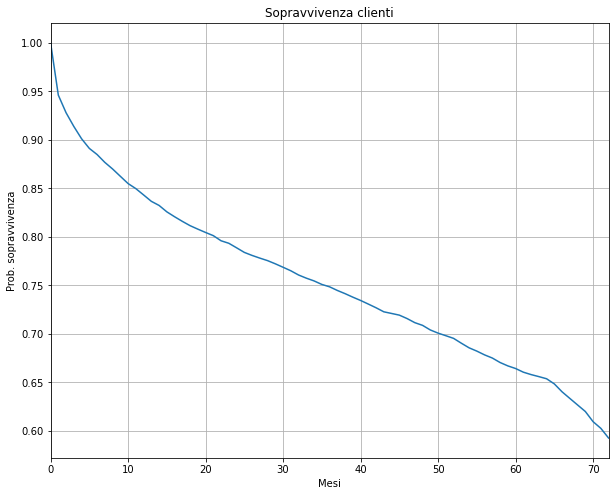

In [15]:
# ed ecco il plot della Survival function calcolata a mano
plt.figure(figsize=(10,8))
plt.xlim((0, 72))
plt.title('Sopravvivenza clienti')
plt.xlabel('Mesi')
plt.ylabel('Prob. sopravvivenza')
plt.plot(st)
plt.grid()

In [16]:
# usiamo ora il package lifelines
kmf = KaplanMeierFitter()

In [18]:
# aggiungo a data_orig una colonna observed che vale 1 se Churn == Yes

data_orig['observed'] = (data_orig['Churn'] == 'Yes') 

T = data_orig["tenure"]
E = data_orig["observed"]

kmf.fit(T, event_observed=E);

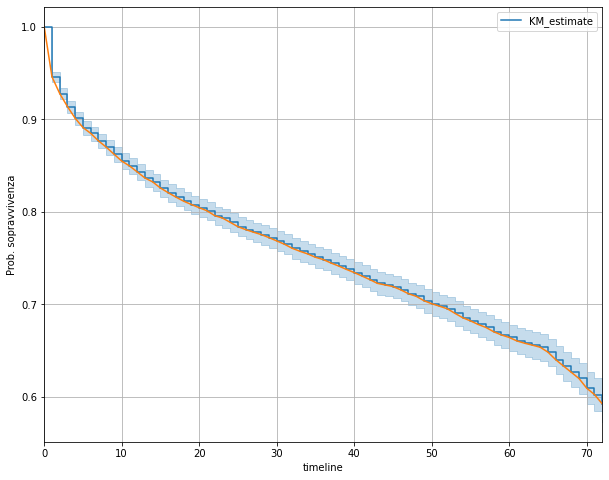

In [19]:
plt.figure(figsize=(10,8))
plt.xlabel('Mesi')
plt.ylabel('Prob. sopravvivenza')
kmf.plot()
plt.plot(st, label='custom')
plt.grid()